In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [4]:
f=pd.read_csv("/Users/katrinepedersen/Desktop/Trips_2018.csv")

In [5]:
f.describe()

Unnamed: 0  tripduration  start_station_id  start_station_latitude  \
count  1.754834e+07  1.754834e+07      1.754584e+07            1.754834e+07   
mean   8.774169e+06  9.887432e+02      1.589282e+03            4.073737e+01   
std    5.065769e+06  1.889584e+04      1.439432e+03            3.225813e-02   
min    0.000000e+00  6.100000e+01      7.200000e+01            4.064654e+01   
25%    4.387084e+06  3.580000e+02      3.800000e+02            4.071755e+01   
50%    8.774169e+06  6.050000e+02      5.050000e+02            4.073818e+01   
75%    1.316125e+07  1.060000e+03      3.249000e+03            4.075763e+01   
max    1.754834e+07  1.951005e+07      3.721000e+03            4.550636e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.754834e+07    1.754584e+07          1.754834e+07   
mean             -7.398260e+01    1.580830e+03          4.073704e+01   
std               1.912753e-02    1.438502e+03          3.206583e-02   
min              -7.402535e+01    7.200000e+01          4.064654e+01   
25%              -7.399521e+01    3.800000e+02          4.071755e+01   
50%              -7.398565e+01    5.050000e+02          4.073756e+01   
75%              -7.397283e+01    3.249000e+03          4.075725e+01   
max              -7.356891e+01    3.721000e+03          4.550636e+01   

       end_station_longitude        bikeid    birth_year        gender  
count           1.754834e+07  1.754834e+07  1.754834e+07  1.754834e+07  
mean           -7.398281e+01  2.656141e+04  1.978993e+03  1.148613e+00  
std             1.919611e-02  6.222916e+03  1.192922e+01  5.438043e-01  
min            -7.408364e+01  1.452900e+04  1.885000e+03  0.000000e+00  
25%            -7.399595e+01  2.029300e+04  1.969000e+03  1.000000e+00  
50%            -7.398602e+01  2.827000e+04  1.981000e+03  1.000000e+00  
75%            -7.397344e+01  3.185200e+04  1.989000e+03  1.000000e+00  
max            -7.356891e+01  3.583100e+04  2.002000e+03  2.000000e+00

In [6]:

f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])

In [7]:
f.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
dtype: object

In [8]:
sm_dummies.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
usertype_Customer                    bool
usertype_Subscriber                  bool
dtype: object

In [9]:
f

Unnamed: 0  tripduration               starttime  \
0                  0           970 2018-01-01 13:50:57.434   
1                  1           723 2018-01-01 15:33:30.182   
2                  2           496 2018-01-01 15:39:18.337   
3                  3           306 2018-01-01 15:40:13.372   
4                  4           306 2018-01-01 18:14:51.568   
...              ...           ...                     ...   
17548334    17548334           734 2018-12-31 23:55:06.991   
17548335    17548335          2551 2018-12-31 23:55:44.307   
17548336    17548336          2376 2018-12-31 23:56:52.850   
17548337    17548337          2758 2018-12-31 23:58:29.212   
17548338    17548338          2459 2018-12-31 23:59:51.085   

                        stoptime  start_station_id  start_station_latitude  \
0        2018-01-01 14:07:08.186              72.0               40.767272   
1        2018-01-01 15:45:33.341              72.0               40.767272   
2        2018-01-01 15:47:35.172              72.0               40.767272   
3        2018-01-01 15:45:20.191              72.0               40.767272   
4        2018-01-01 18:19:57.642              72.0               40.767272   
...                          ...               ...                     ...   
17548334 2019-01-01 00:07:21.230             336.0               40.730477   
17548335 2019-01-01 00:38:15.782            3320.0               40.794067   
17548336 2019-01-01 00:36:29.286             427.0               40.701907   
17548337 2019-01-01 00:44:27.517            3320.0               40.794067   
17548338 2019-01-01 00:40:50.880             128.0               40.727103   

          start_station_longitude  end_station_id  end_station_latitude  \
0                      -73.993929           505.0             40.749013   
1                      -73.993929          3255.0             40.750585   
2                      -73.993929           525.0             40.755942   
3                      -73.993929           447.0             40.763707   
4                      -73.993929          3356.0             40.774667   
...                           ...             ...                   ...   
17548334               -73.999061           379.0             40.749156   
17548335               -73.962868          2006.0             40.765909   
17548336               -74.013942           259.0             40.701221   
17548337               -73.962868           281.0             40.764397   
17548338               -74.002971           402.0             40.740343   

          end_station_longitude  bikeid    usertype  birth_year  gender  \
0                    -73.988484   31956  Subscriber        1992       1   
1                    -73.994685   32536  Subscriber        1969       1   
2                    -74.002116   16069  Subscriber        1956       1   
3                    -73.985162   31781  Subscriber        1974       1   
4                    -73.984706   30319  Subscriber        1992       1   
...                         ...     ...         ...         ...     ...   
17548334             -73.991600   27111  Subscriber        1986       1   
17548335             -73.976342   16390    Customer        1969       0   
17548336             -74.012342   34398  Subscriber        1979       1   
17548337             -73.973715   30818    Customer        1969       0   
17548338             -73.989551   34775  Subscriber        1996       2   

          weekday  is_weekend  
0               0       False  
1               0       False  
2               0       False  
3               0       False  
4               0       False  
...           ...         ...  
17548334        0       False  
17548335        0       False  
17548336        0       False  
17548337        0       False  
17548338        0       False  

[17548339 rows x 16 columns]

# Clustering

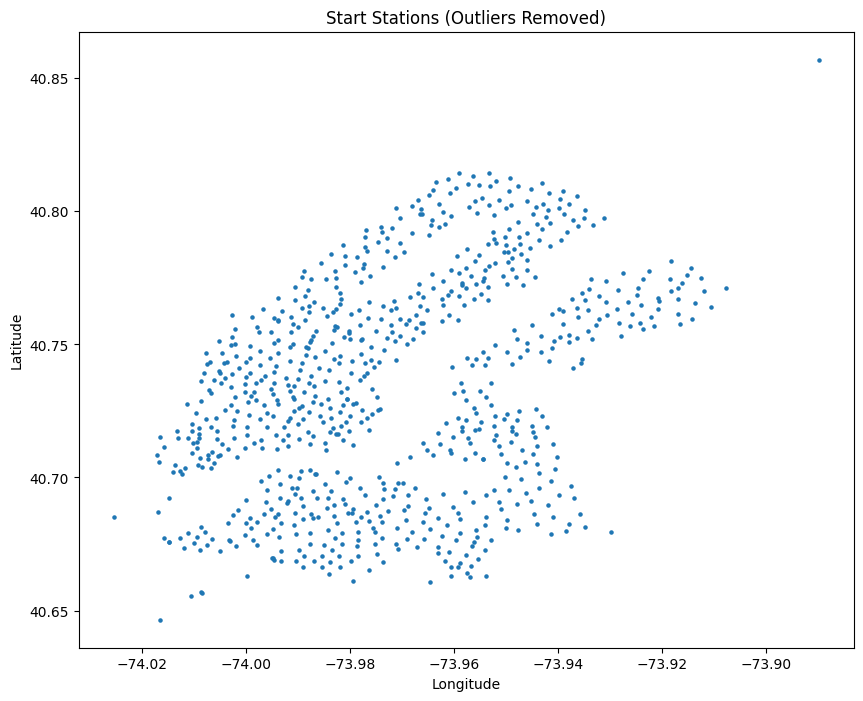

In [10]:
# Remove duplicates by station
new_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
new_df = new_df.set_index("start_station_id")

# Find max longitude and max latitude
max_lon = new_df['start_station_longitude'].max()
max_lat = new_df['start_station_latitude'].max()

# Remove rows where longitude OR latitude is maximum
df_cleaned = new_df[
    ~((new_df['start_station_longitude'] == max_lon) |
      (new_df['start_station_latitude'] == max_lat))
]

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_cleaned['start_station_longitude'], df_cleaned['start_station_latitude'], s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start Stations (Outliers Removed)")
plt.show()

## DBScan

In [11]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(min_samples=30, eps=0.009) 
x = df_cleaned[['start_station_longitude', 'start_station_latitude']].values
dbs.fit(x)

DBSCAN(eps=0.009, min_samples=30)

In [12]:
dbs.labels_

array([-1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  1,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,
        0,  1,  0, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1

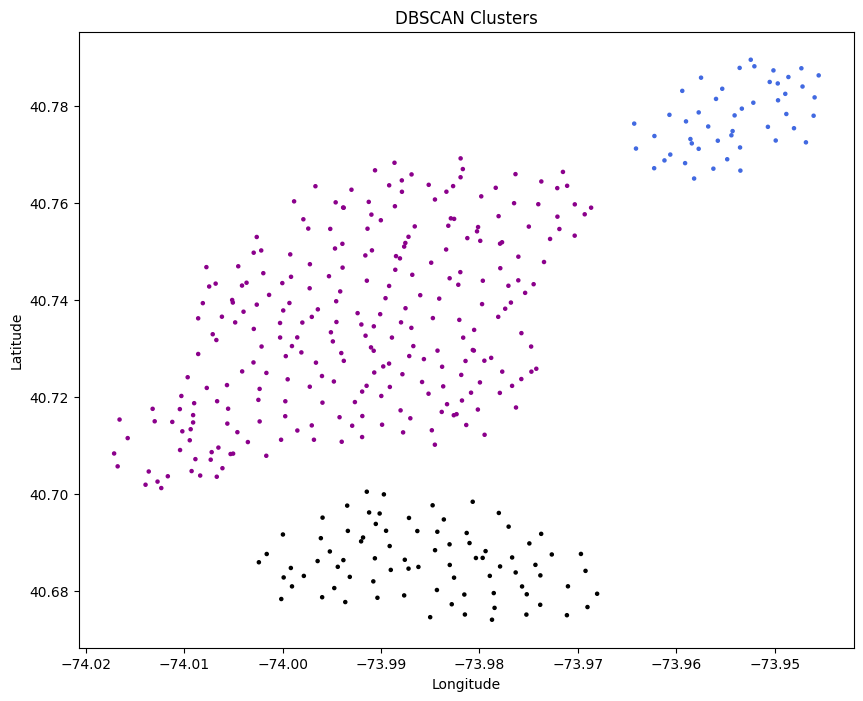

In [13]:
import random
from matplotlib import colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())

# Map each cluster label to a color
unique_labels = set(dbs.labels_)
unique_labels.discard(-1)
cluster_colors_map = {label: random.choice(colors) for label in unique_labels}

x_ = []
y_ = []
c_ = []
for label, coord in zip(dbs.labels_, x):
    if label == -1:
        continue
    x_.append(coord[0])  # longitude
    y_.append(coord[1])  # latitude
    c_.append(cluster_colors_map[label])

plt.figure(figsize=(10,8))
plt.scatter(x_, y_, s=5, c=c_)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clusters")
plt.show()

## K-means

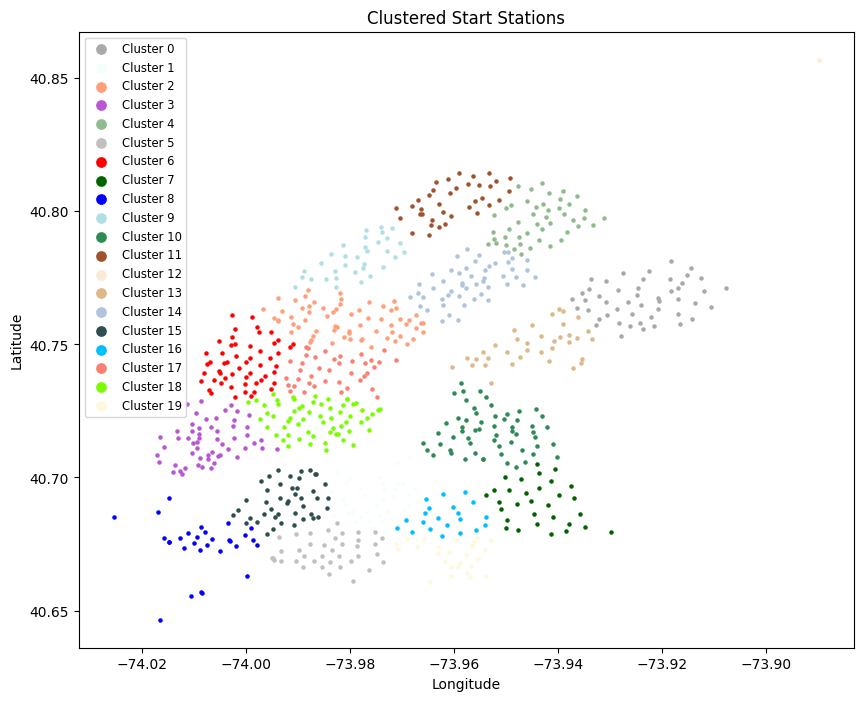

In [14]:
from sklearn.cluster import KMeans
K=20
k=KMeans(K)

k.fit(df_cleaned)
dt_clusters=df_cleaned.copy()
dt_clusters['cluster']=k.fit_predict(df_cleaned)
dt_clusters
# Number of clusters (excluding label -1)
num_colors = K  # number of clusters
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.sample(colors, k=num_colors)  # better than choices for unique colors

# Coordinates and labels
x_points = dt_clusters["start_station_longitude"]
y_points = dt_clusters["start_station_latitude"]
labels = dt_clusters["cluster"]

plt.figure(figsize=(10, 8))

# Plot each cluster separately with its own color and label
for label in sorted(set(labels)):
    if label == -1:
        continue  # skip noise points
    cluster_mask = labels == label
    plt.scatter(
        x_points[cluster_mask],
        y_points[cluster_mask],
        s=5,
        c=cluster_colors[label],
        label=f"Cluster {label}"
    )

# Optional: if you want to visualize noise (-1)
if -1 in labels.values:
    noise_mask = labels == -1
    plt.scatter(
        x_points[noise_mask],
        y_points[noise_mask],
        s=5,
        c="black",
        label="Noise (-1)"
    )

# Formatting
#plt.xlim(-74.05, -73.9)
#plt.ylim(40.6, 40.85)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustered Start Stations")
plt.legend(markerscale=3, fontsize='small')
plt.show()

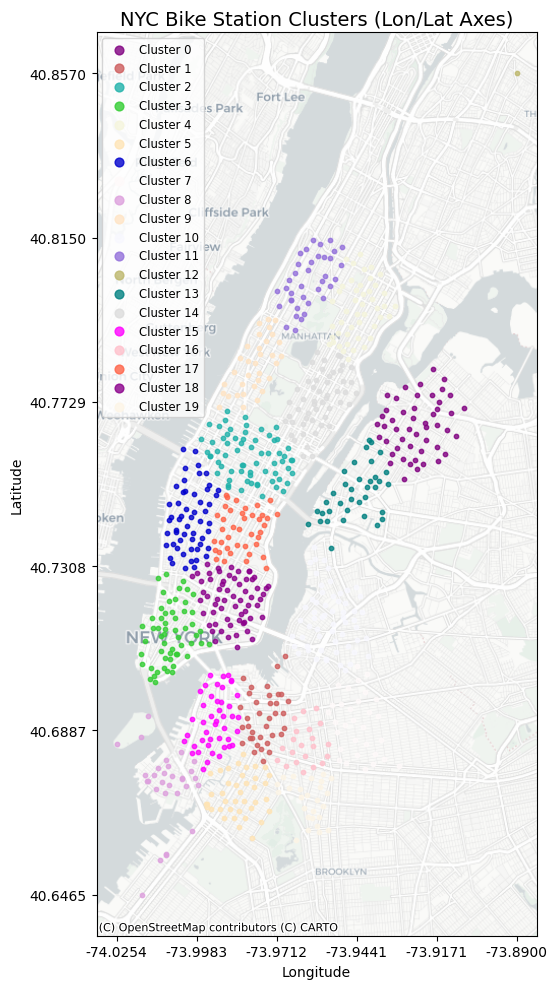

In [15]:
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import numpy as np
import pyproj

# Number of clusters (excluding -1)
num_colors = K
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.sample(colors, k=num_colors)

# Create GeoDataFrame with geometry in lon/lat
geometry = [Point(xy) for xy in zip(
    dt_clusters["start_station_longitude"],
    dt_clusters["start_station_latitude"]
)]
gdf = gpd.GeoDataFrame(dt_clusters, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator for basemap
gdf_3857 = gdf.to_crs(epsg=3857)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))

# Map cluster label → color
unique_labels = sorted(set(gdf["cluster"]))
unique_labels = [l for l in unique_labels if l != -1]
label_color_map = {label: cluster_colors[i] for i, label in enumerate(unique_labels)}

# Plot clusters
for label in unique_labels:
    mask = gdf_3857["cluster"] == label
    gdf_3857[mask].plot(
        ax=ax,
        markersize=10,
        color=label_color_map[label],
        label=f"Cluster {label}",
        alpha=0.8
    )

# Optional: plot noise (-1)
if -1 in gdf_3857["cluster"].values:
    gdf_3857[gdf_3857["cluster"] == -1].plot(
        ax=ax,
        markersize=8,
        color="black",
        label="Noise (-1)",
        alpha=0.5
    )

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# -----------------------------
# Set axis ticks to longitude/latitude
# -----------------------------
project = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
xticks = np.linspace(gdf_3857.total_bounds[0], gdf_3857.total_bounds[2], 6)
yticks = np.linspace(gdf_3857.total_bounds[1], gdf_3857.total_bounds[3], 6)
xtick_labels, ytick_labels = project.transform(xticks, yticks)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([f"{x:.4f}" for x in xtick_labels])
ax.set_yticklabels([f"{y:.4f}" for y in ytick_labels])

# Formatting
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("NYC Bike Station Clusters (Lon/Lat Axes)", fontsize=14)
ax.legend(markerscale=2, fontsize="small", loc="upper left")
plt.tight_layout()
plt.show()



In [16]:
df_merged = f.merge(dt_clusters[['cluster']], left_on = "start_station_id", right_index = True, how = "left")
df_merged = df_merged.drop(columns = ["Unnamed: 0"])

In [17]:
df_merged

tripduration               starttime                stoptime  \
0                  970 2018-01-01 13:50:57.434 2018-01-01 14:07:08.186   
1                  723 2018-01-01 15:33:30.182 2018-01-01 15:45:33.341   
2                  496 2018-01-01 15:39:18.337 2018-01-01 15:47:35.172   
3                  306 2018-01-01 15:40:13.372 2018-01-01 15:45:20.191   
4                  306 2018-01-01 18:14:51.568 2018-01-01 18:19:57.642   
...                ...                     ...                     ...   
17548334           734 2018-12-31 23:55:06.991 2019-01-01 00:07:21.230   
17548335          2551 2018-12-31 23:55:44.307 2019-01-01 00:38:15.782   
17548336          2376 2018-12-31 23:56:52.850 2019-01-01 00:36:29.286   
17548337          2758 2018-12-31 23:58:29.212 2019-01-01 00:44:27.517   
17548338          2459 2018-12-31 23:59:51.085 2019-01-01 00:40:50.880   

          start_station_id  start_station_latitude  start_station_longitude  \
0                     72.0               40.767272               -73.993929   
1                     72.0               40.767272               -73.993929   
2                     72.0               40.767272               -73.993929   
3                     72.0               40.767272               -73.993929   
4                     72.0               40.767272               -73.993929   
...                    ...                     ...                      ...   
17548334             336.0               40.730477               -73.999061   
17548335            3320.0               40.794067               -73.962868   
17548336             427.0               40.701907               -74.013942   
17548337            3320.0               40.794067               -73.962868   
17548338             128.0               40.727103               -74.002971   

          end_station_id  end_station_latitude  end_station_longitude  bikeid  \
0                  505.0             40.749013             -73.988484   31956   
1                 3255.0             40.750585             -73.994685   32536   
2                  525.0             40.755942             -74.002116   16069   
3                  447.0             40.763707             -73.985162   31781   
4                 3356.0             40.774667             -73.984706   30319   
...                  ...                   ...                    ...     ...   
17548334           379.0             40.749156             -73.991600   27111   
17548335          2006.0             40.765909             -73.976342   16390   
17548336           259.0             40.701221             -74.012342   34398   
17548337           281.0             40.764397             -73.973715   30818   
17548338           402.0             40.740343             -73.989551   34775   

            usertype  birth_year  gender  weekday  is_weekend  cluster  
0         Subscriber        1992       1        0       False      2.0  
1         Subscriber        1969       1        0       False      2.0  
2         Subscriber        1956       1        0       False      2.0  
3         Subscriber        1974       1        0       False      2.0  
4         Subscriber        1992       1        0       False      2.0  
...              ...         ...     ...      ...         ...      ...  
17548334  Subscriber        1986       1        0       False      6.0  
17548335    Customer        1969       0        0       False     11.0  
17548336  Subscriber        1979       1        0       False      3.0  
17548337    Customer        1969       0        0       False     11.0  
17548338  Subscriber        1996       2        0       False      3.0  

[17548339 rows x 16 columns]

In [18]:
cluster_df = df_merged[df_merged["cluster"] == 19]

In [19]:
cluster_df

tripduration               starttime                stoptime  \
609965             881 2018-01-01 10:12:04.801 2018-01-01 10:26:46.216   
609966            1097 2018-01-01 10:54:09.468 2018-01-01 11:12:26.674   
609967             592 2018-01-01 16:22:39.614 2018-01-01 16:32:31.814   
609968             478 2018-01-01 16:50:40.538 2018-01-01 16:58:39.431   
609969             955 2018-01-01 18:20:48.640 2018-01-01 18:36:44.063   
...                ...                     ...                     ...   
17548110           659 2018-12-31 21:17:24.340 2018-12-31 21:28:24.034   
17548201           476 2018-12-31 22:18:43.037 2018-12-31 22:26:39.569   
17548215           227 2018-12-31 22:23:45.009 2018-12-31 22:27:32.462   
17548297          1013 2018-12-31 23:20:05.062 2018-12-31 23:36:58.086   
17548302           330 2018-12-31 23:23:24.358 2018-12-31 23:28:55.170   

          start_station_id  start_station_latitude  start_station_longitude  \
609965              3349.0               40.672968               -73.970880   
609966              3349.0               40.672968               -73.970880   
609967              3349.0               40.672968               -73.970880   
609968              3349.0               40.672968               -73.970880   
609969              3349.0               40.672968               -73.970880   
...                    ...                     ...                      ...   
17548110            3579.0               40.672695               -73.954131   
17548201            3581.0               40.674012               -73.967146   
17548215            3584.0               40.670777               -73.957680   
17548297            3604.0               40.663062               -73.953875   
17548302            3596.0               40.664241               -73.957469   

          end_station_id  end_station_latitude  end_station_longitude  bikeid  \
609965             245.0             40.693270             -73.977039   33012   
609966             373.0             40.693317             -73.953820   24936   
609967            3346.0             40.675147             -73.975232   33022   
609968            3300.0             40.665147             -73.976376   30153   
609969             373.0             40.693317             -73.953820   26666   
...                  ...                   ...                    ...     ...   
17548110          3042.0             40.679427             -73.929891   35767   
17548201          3601.0             40.662706             -73.956912   35722   
17548215          3596.0             40.664241             -73.957469   35796   
17548297          3397.0             40.676395             -73.998699   17828   
17548302          3584.0             40.670777             -73.957680   35796   

            usertype  birth_year  gender  weekday  is_weekend  cluster  
609965    Subscriber        1984       2        0       False     19.0  
609966    Subscriber        1968       1        0       False     19.0  
609967    Subscriber        1991       2        0       False     19.0  
609968    Subscriber        1971       2        0       False     19.0  
609969    Subscriber        1968       1        0       False     19.0  
...              ...         ...     ...      ...         ...      ...  
17548110  Subscriber        1997       1        0       False     19.0  
17548201  Subscriber        1986       1        0       False     19.0  
17548215  Subscriber        1999       1        0       False     19.0  
17548297  Subscriber        1991       1        0       False     19.0  
17548302  Subscriber        1999       1        0       False     19.0  

[188484 rows x 16 columns]

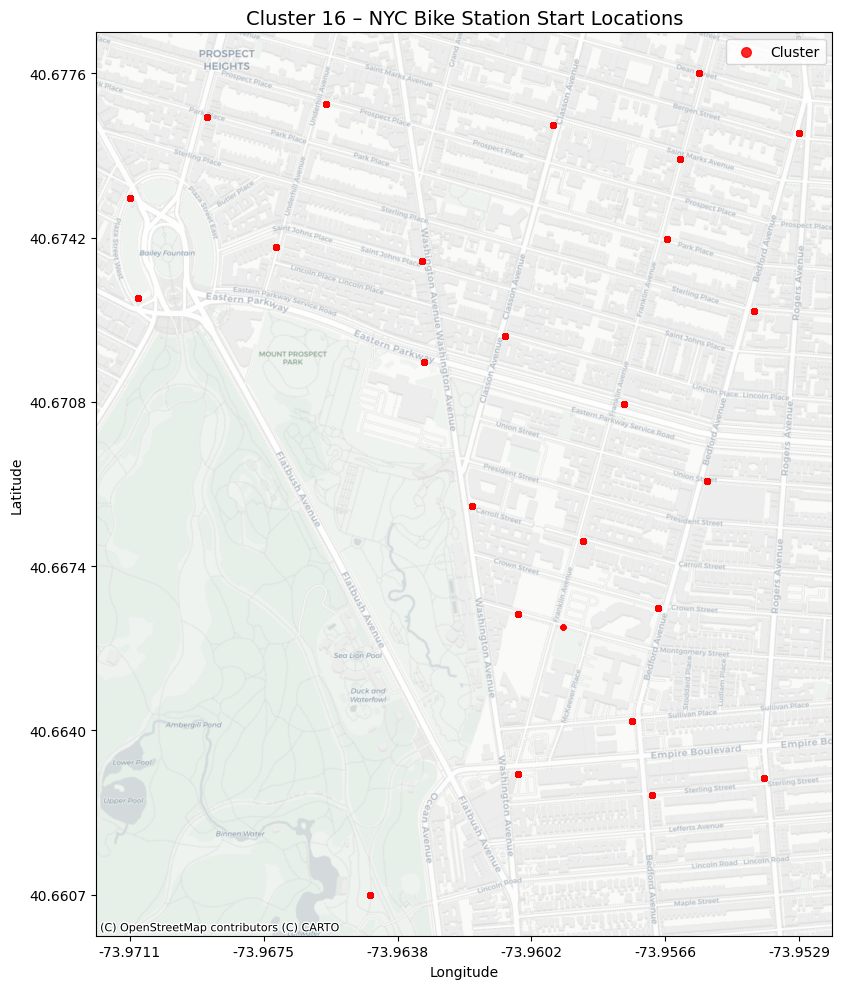

In [20]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import numpy as np
import pyproj

# Use only cluster 16 data
gdf = cluster_df.copy()

# Create geometry
geometry = [Point(xy) for xy in zip(
    gdf["start_station_longitude"],
    gdf["start_station_latitude"]
)]
gdf = gpd.GeoDataFrame(gdf, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator
gdf_3857 = gdf.to_crs(epsg=3857)


# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))

# Plot only cluster 16
gdf_3857.plot(
    ax=ax,
    markersize=12,
    color= "red",
    label="Cluster",
    alpha=0.85
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# -------- Axis ticks (convert back to lon/lat) --------
project = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
xticks = np.linspace(gdf_3857.total_bounds[0], gdf_3857.total_bounds[2], 6)
yticks = np.linspace(gdf_3857.total_bounds[1], gdf_3857.total_bounds[3], 6)
xtick_labels, ytick_labels = project.transform(xticks, yticks)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([f"{x:.4f}" for x in xtick_labels])
ax.set_yticklabels([f"{y:.4f}" for y in ytick_labels])



# Formatting
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Cluster 16 – NYC Bike Station Start Locations", fontsize=14)
ax.legend(markerscale=2, fontsize="medium")
plt.tight_layout()
plt.show()


## Explore data time series concept 

### Investigating one cluster

In [21]:
cluster = df_merged[df_merged["cluster"]==19]
cluster = cluster.copy()

# Make sure starttime is a datetime
cluster['starttime'] = pd.to_datetime(cluster['starttime'])

# Extract date and hour
cluster['date'] = cluster['starttime'].dt.date
cluster['hour'] = cluster['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour['datetime'] = pd.to_datetime(trips_per_hour['date'].astype(str)) + pd.to_timedelta(trips_per_hour['hour'], unit='h')
trips_per_hour.set_index('datetime', inplace=True)
trips_per_hour.drop(columns=['date'], inplace=True)

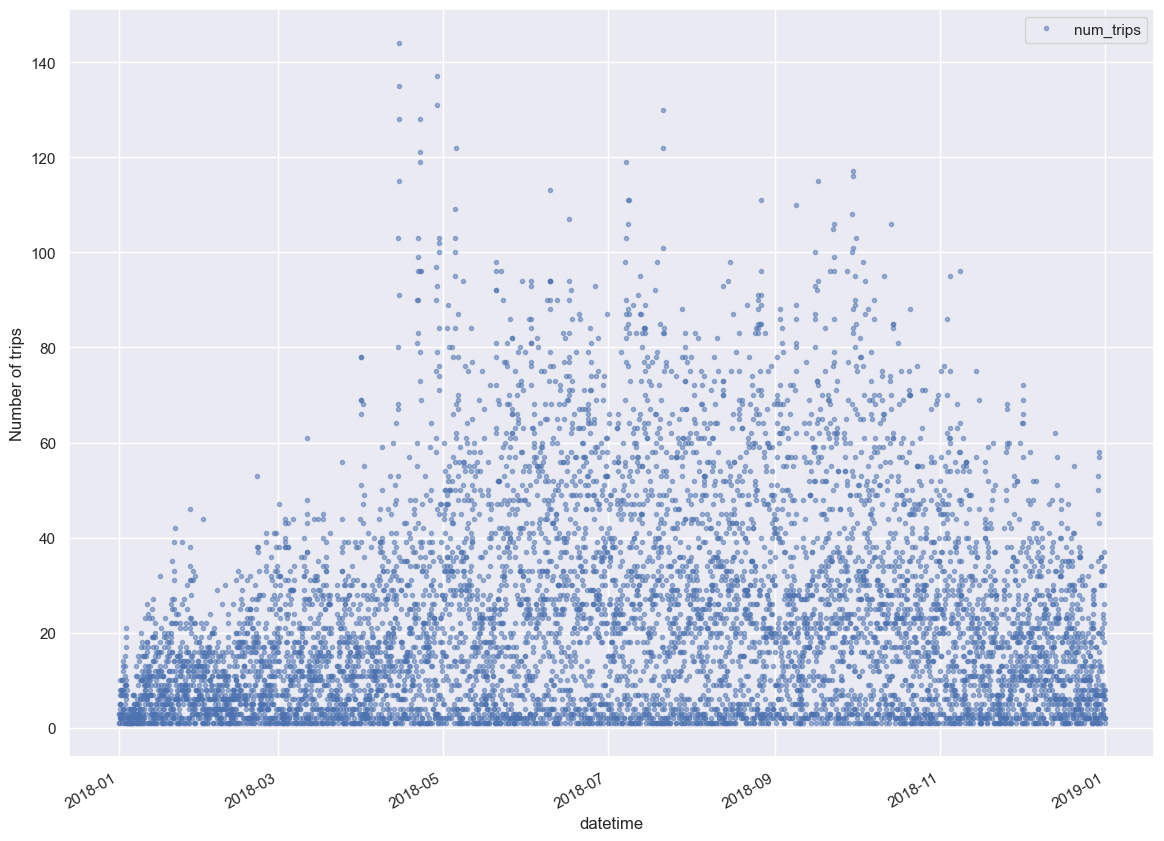

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

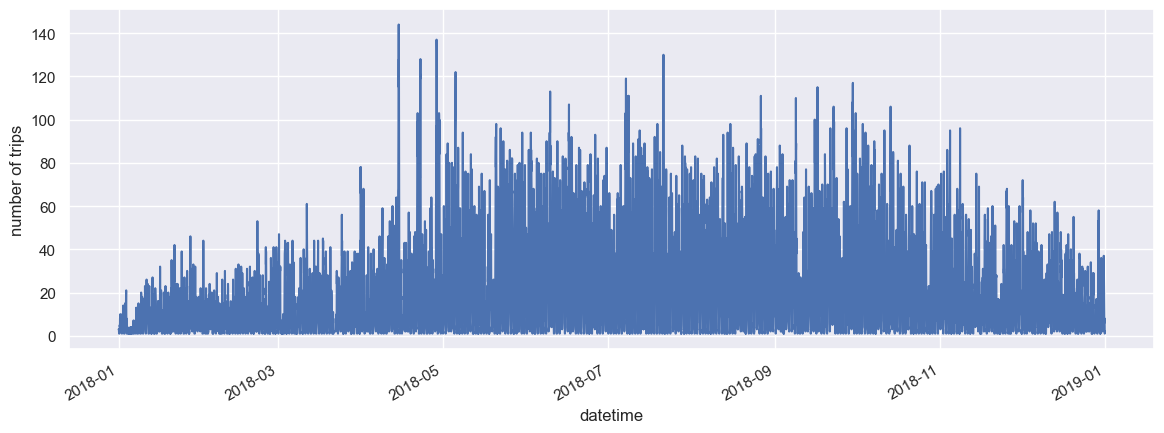

In [23]:
ax = trips_per_hour.loc['2018', 'num_trips'].plot()
ax.set_ylabel('number of trips')

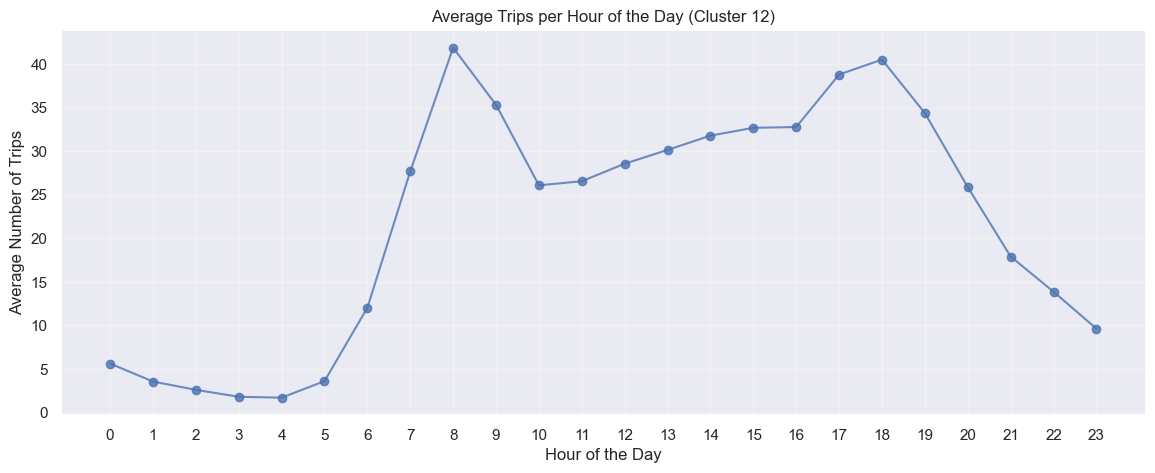

In [24]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour = trips_per_hour.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()

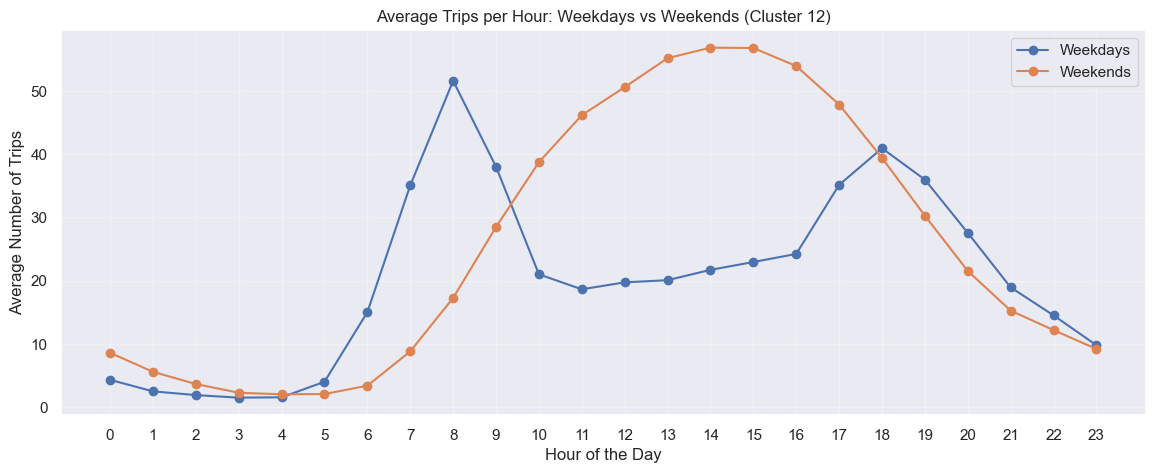

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour from datetime index if not already present
trips_per_hour['hour'] = trips_per_hour.index.hour
trips_per_hour['is_weekend'] = trips_per_hour.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour[~trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour[trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends (Cluster 12)')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

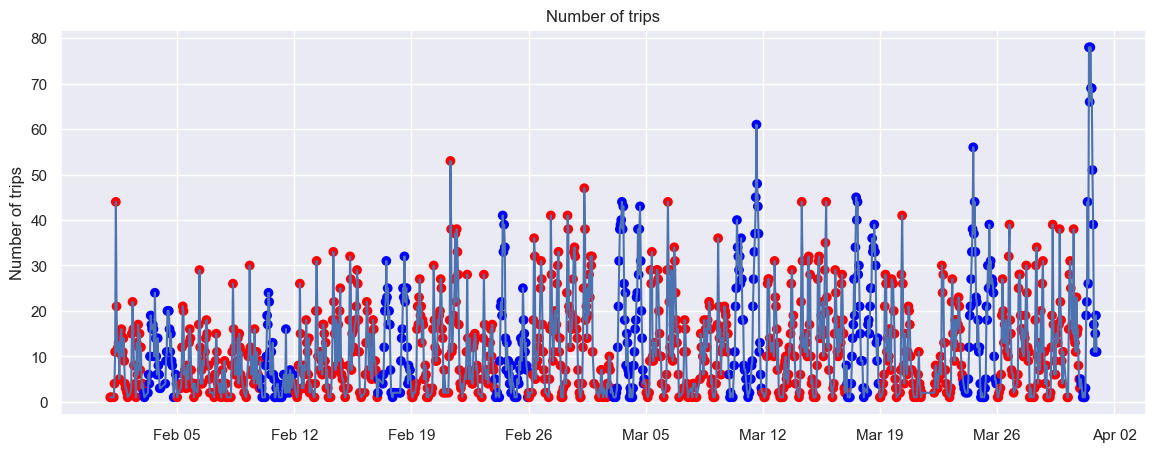

In [26]:
import matplotlib.dates as mdates
weekends=trips_per_hour.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour.loc['2018-02':'2018-03'].index, trips_per_hour.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Investigating all data 

In [27]:

# Make sure starttime is a datetime
df_merged['starttime'] = pd.to_datetime(df_merged['starttime'])

# Extract date and hour
df_merged['date'] = df_merged['starttime'].dt.date
df_merged['hour'] = df_merged['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour_all = df_merged.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour_all['datetime'] = pd.to_datetime(trips_per_hour_all['date'].astype(str)) + pd.to_timedelta(trips_per_hour_all['hour'], unit='h')
trips_per_hour_all.set_index('datetime', inplace=True)
trips_per_hour_all.drop(columns=['date'], inplace=True)

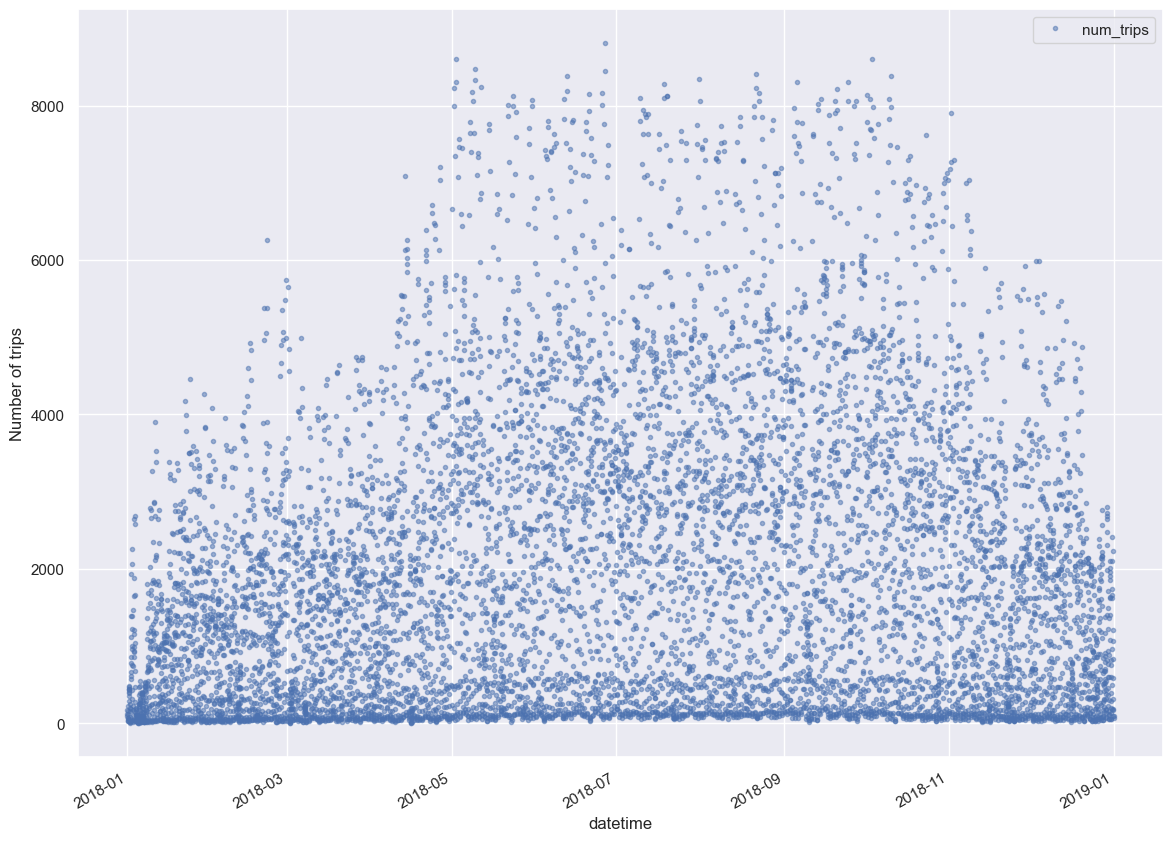

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour_all[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

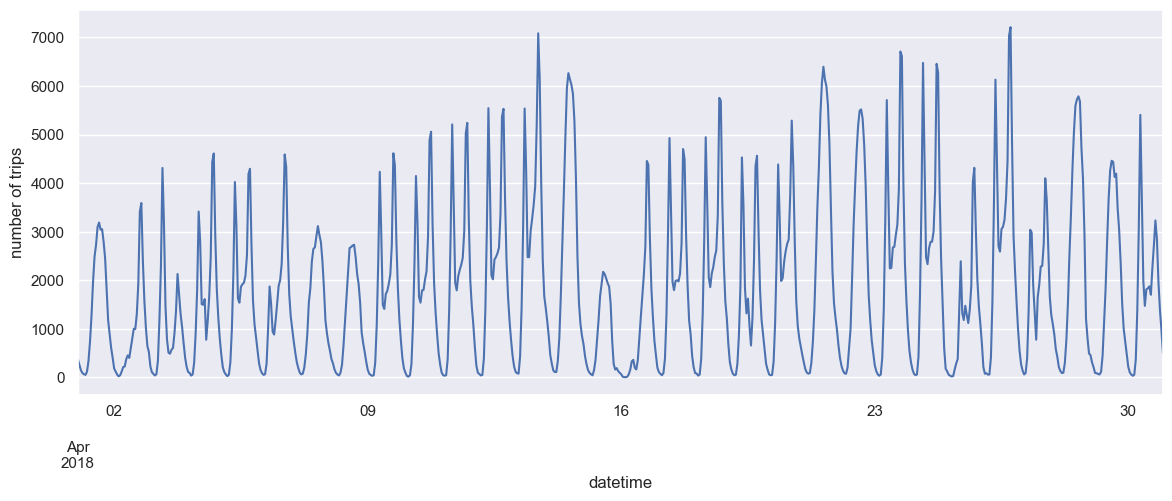

In [29]:
ax = trips_per_hour_all.loc['2018-04', 'num_trips'].plot()
ax.set_ylabel('number of trips')

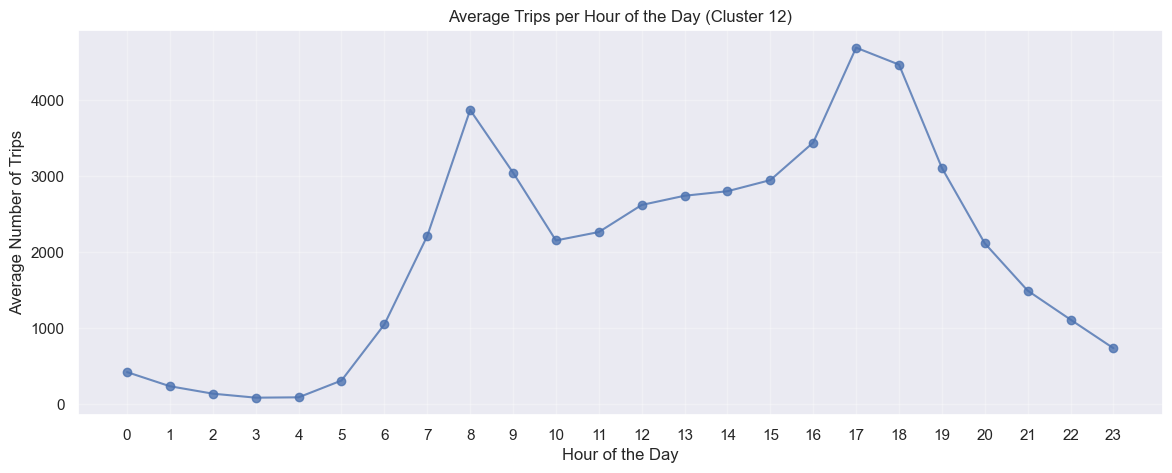

In [30]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour_all = trips_per_hour_all.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour_all.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()

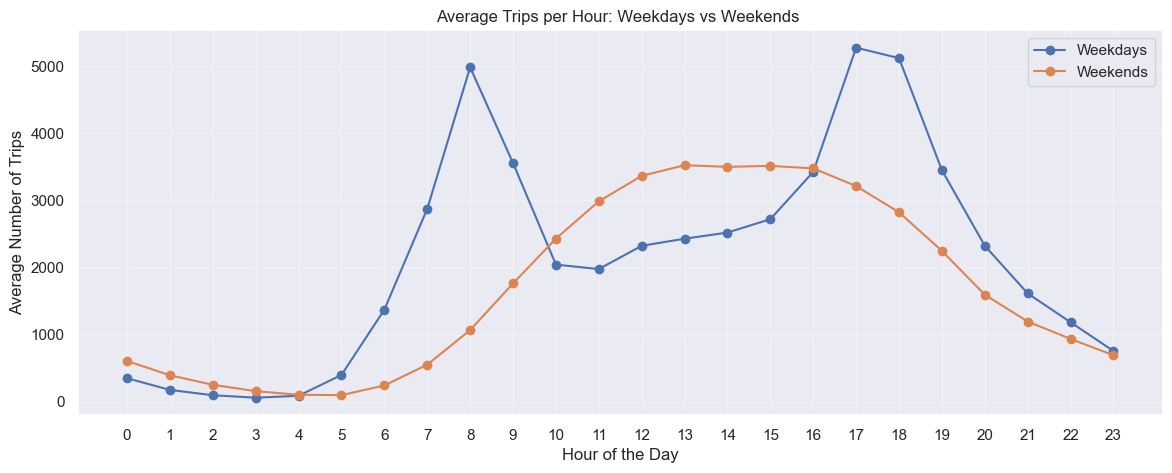

In [31]:
# Extract hour from datetime index if not already present
trips_per_hour_all['hour'] = trips_per_hour_all.index.hour
trips_per_hour_all['is_weekend'] = trips_per_hour_all.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour_all[~trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour_all[trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends ')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

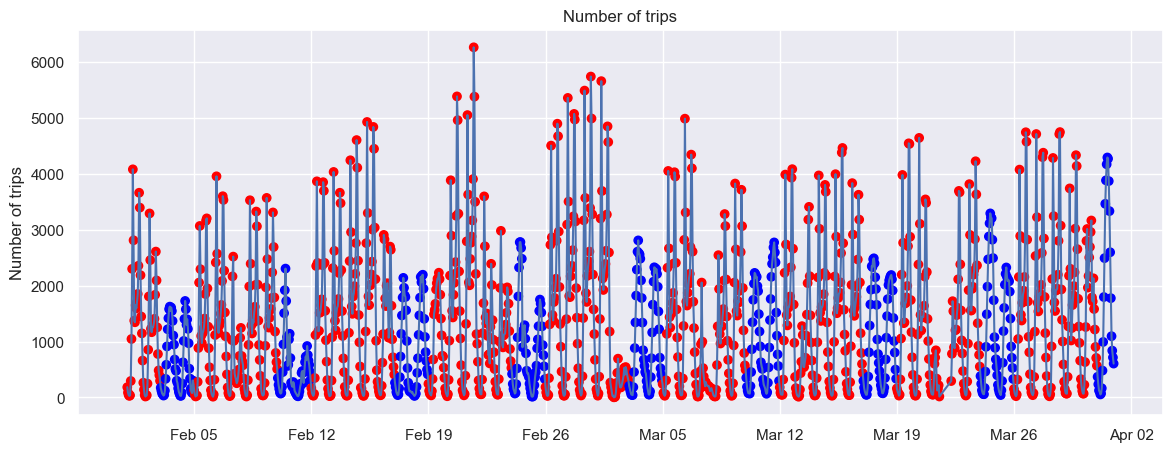

In [32]:
weekends=trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour_all.loc['2018-02':'2018-03'].index, trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### Seasonality in all data

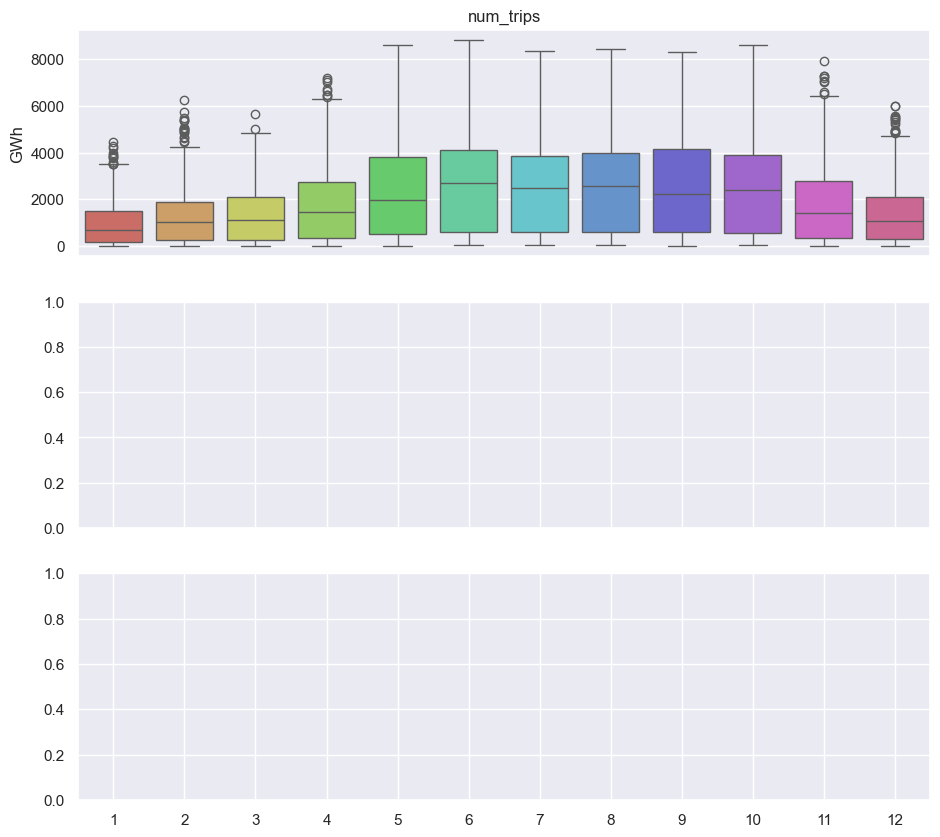

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
trips_per_hour_all['Month'] = trips_per_hour_all.index.month
for name, ax in zip(['num_trips'], axes):
    sns.boxplot(data=trips_per_hour_all, x='Month', y=name, ax=ax, hue='Month',palette=sns.color_palette("hls", 12),legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

<Axes: xlabel='hour', ylabel='num_trips'>

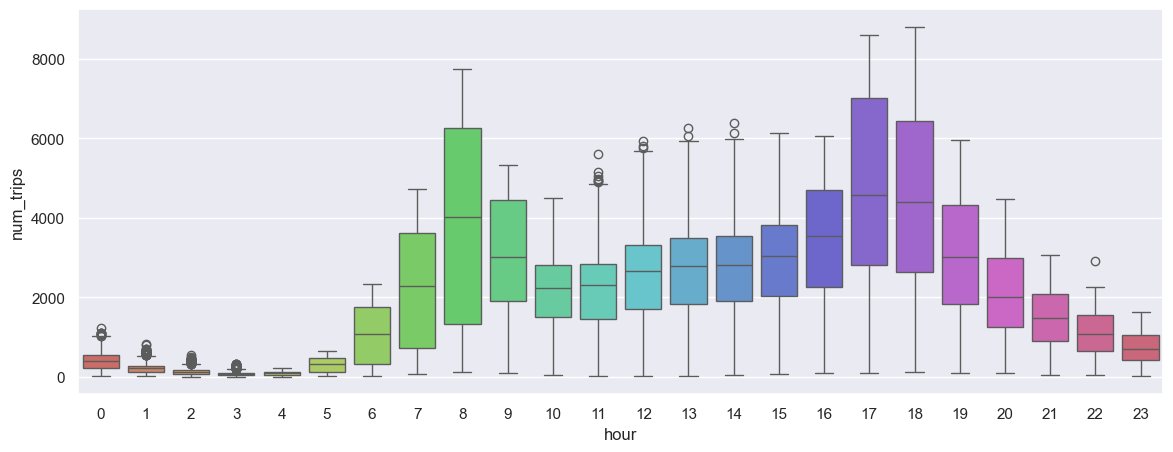

In [35]:
sns.boxplot(data=trips_per_hour_all, x='hour', y='num_trips',hue='hour',palette=sns.color_palette("hls", 24),legend=False)

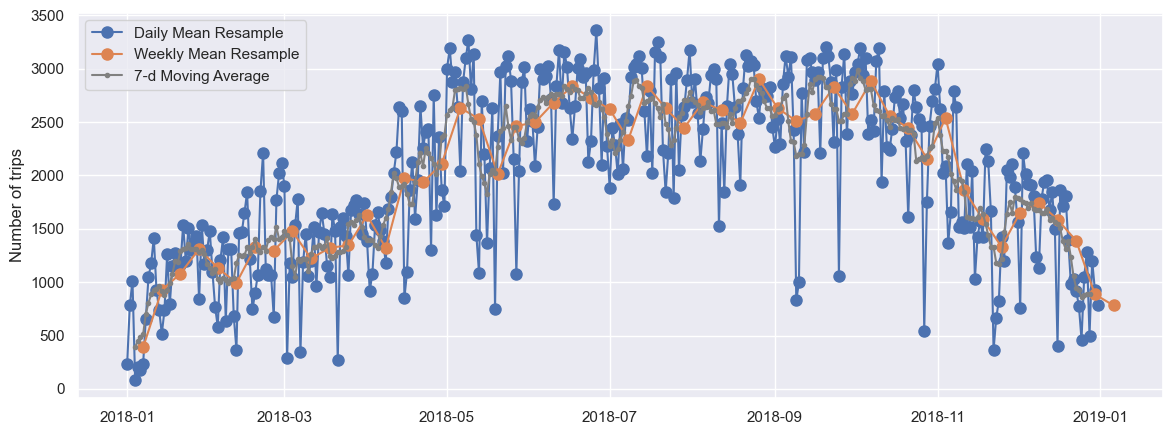

In [36]:
data_columns = ['num_trips']
opsd_daily_mean = trips_per_hour_all[data_columns].resample('D').mean()
opsd_daily_mean[:3]
opsd_weekly_mean = trips_per_hour_all[data_columns].resample('W').mean()
opsd_weekly_mean[:3]

opsd_7d = opsd_daily_mean[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(opsd_weekly_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='7-d Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

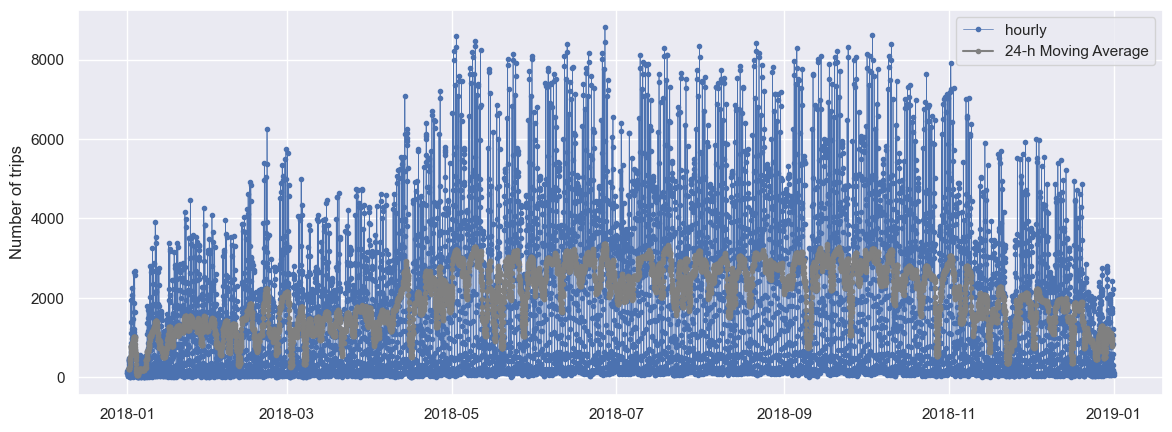

In [37]:
opsd_24h = trips_per_hour_all[data_columns].rolling(24, center=True).mean()
start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc[start:end, 'num_trips'],
marker='.', linestyle='-', linewidth=0.5, label='hourly')
ax.plot(opsd_24h.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='24-h Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

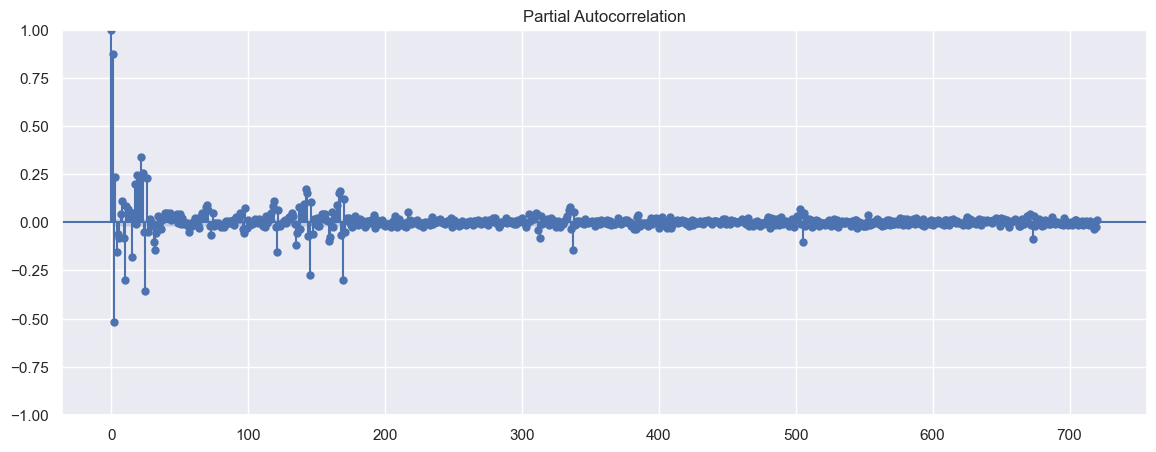

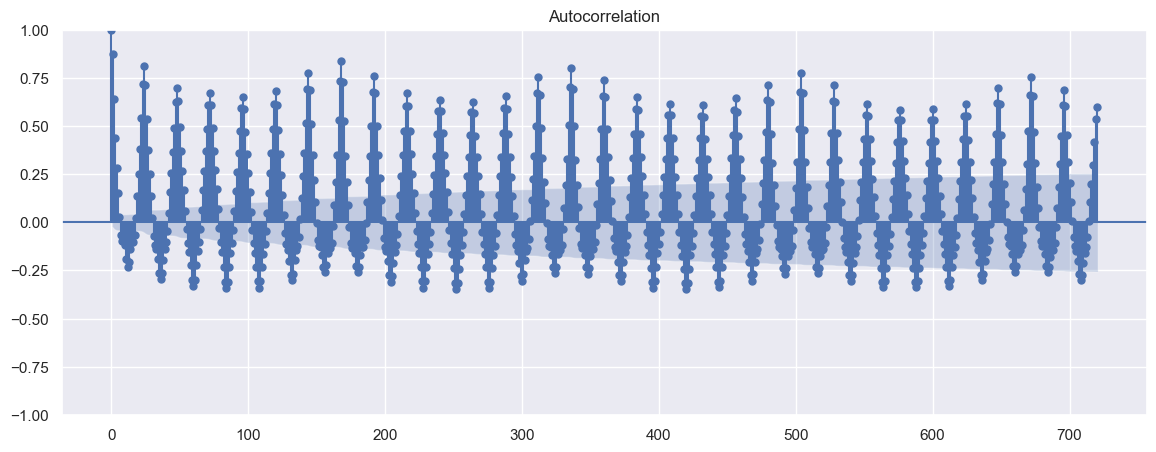

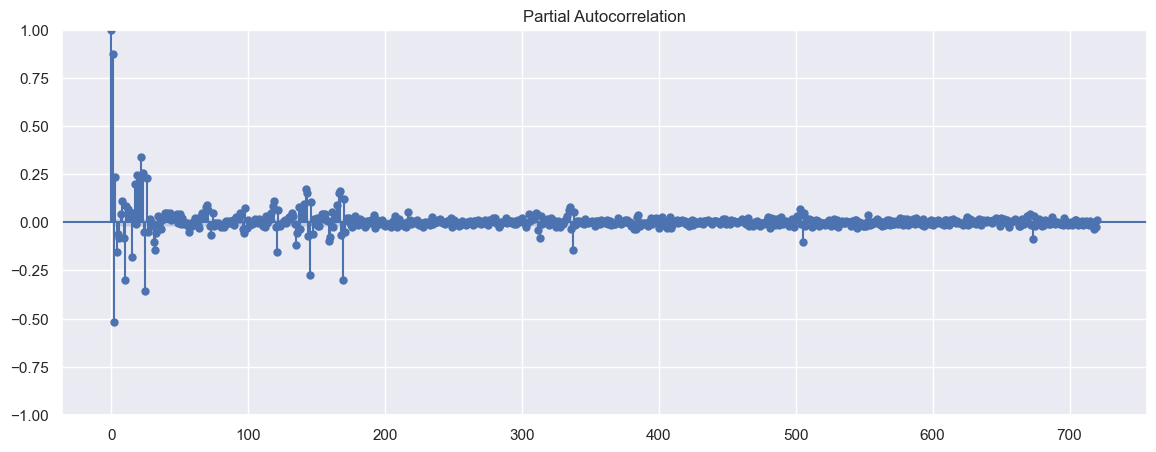

In [39]:
plot_acf(trips_per_hour_all['num_trips'],lags=30*24) # lags valgt udfra 10 dage gnage 24 timer
plot_pacf(trips_per_hour_all['num_trips'],lags=30*24)

# Further investigation of what variables to keep for our prediction model

We discussed: leaving out starttime, stoptime, and longitude and latitude for both end station and startstation. The spatial because we now just care which cluster we are in, therefore also leave out the stations ID. Starttime is relevant stop time not su much because we try to predict demand. ANd the trip duration will be kept, also weekend, birth year, most common usertype, and most common gender. Bike ID have also been left out as it seems irrelevant to know which bike goes where at this point. 

In [40]:
cluster = df_merged[df_merged["cluster"]==19]
cluster = cluster.copy()

# Make sure starttime is a datetime
cluster['starttime'] = pd.to_datetime(cluster['starttime'])

# Extract date and hour
cluster['date'] = cluster['starttime'].dt.date
cluster['hour'] = cluster['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster.groupby(['date', 'hour'])
trips_per_hour.head()

tripduration               starttime                stoptime  \
609965             881 2018-01-01 10:12:04.801 2018-01-01 10:26:46.216   
609966            1097 2018-01-01 10:54:09.468 2018-01-01 11:12:26.674   
609967             592 2018-01-01 16:22:39.614 2018-01-01 16:32:31.814   
609968             478 2018-01-01 16:50:40.538 2018-01-01 16:58:39.431   
609969             955 2018-01-01 18:20:48.640 2018-01-01 18:36:44.063   
...                ...                     ...                     ...   
17548110           659 2018-12-31 21:17:24.340 2018-12-31 21:28:24.034   
17548201           476 2018-12-31 22:18:43.037 2018-12-31 22:26:39.569   
17548215           227 2018-12-31 22:23:45.009 2018-12-31 22:27:32.462   
17548297          1013 2018-12-31 23:20:05.062 2018-12-31 23:36:58.086   
17548302           330 2018-12-31 23:23:24.358 2018-12-31 23:28:55.170   

          start_station_id  start_station_latitude  start_station_longitude  \
609965              3349.0               40.672968               -73.970880   
609966              3349.0               40.672968               -73.970880   
609967              3349.0               40.672968               -73.970880   
609968              3349.0               40.672968               -73.970880   
609969              3349.0               40.672968               -73.970880   
...                    ...                     ...                      ...   
17548110            3579.0               40.672695               -73.954131   
17548201            3581.0               40.674012               -73.967146   
17548215            3584.0               40.670777               -73.957680   
17548297            3604.0               40.663062               -73.953875   
17548302            3596.0               40.664241               -73.957469   

          end_station_id  end_station_latitude  end_station_longitude  bikeid  \
609965             245.0             40.693270             -73.977039   33012   
609966             373.0             40.693317             -73.953820   24936   
609967            3346.0             40.675147             -73.975232   33022   
609968            3300.0             40.665147             -73.976376   30153   
609969             373.0             40.693317             -73.953820   26666   
...                  ...                   ...                    ...     ...   
17548110          3042.0             40.679427             -73.929891   35767   
17548201          3601.0             40.662706             -73.956912   35722   
17548215          3596.0             40.664241             -73.957469   35796   
17548297          3397.0             40.676395             -73.998699   17828   
17548302          3584.0             40.670777             -73.957680   35796   

            usertype  birth_year  gender  weekday  is_weekend  cluster  \
609965    Subscriber        1984       2        0       False     19.0   
609966    Subscriber        1968       1        0       False     19.0   
609967    Subscriber        1991       2        0       False     19.0   
609968    Subscriber        1971       2        0       False     19.0   
609969    Subscriber        1968       1        0       False     19.0   
...              ...         ...     ...      ...         ...      ...   
17548110  Subscriber        1997       1        0       False     19.0   
17548201  Subscriber        1986       1        0       False     19.0   
17548215  Subscriber        1999       1        0       False     19.0   
17548297  Subscriber        1991       1        0       False     19.0   
17548302  Subscriber        1999       1        0       False     19.0   

                date  hour  
609965    2018-01-01    10  
609966    2018-01-01    10  
609967    2018-01-01    16  
609968    2018-01-01    16  
609969    2018-01-01    18  
...              ...   ...  
17548110  2018-12-31    21  
17548201  2018-12-31    22  
17548215  2018-12-31    22  
17548297  2018-12-31

In [41]:
cluster.index.name = 'trip_id'
cluster

tripduration               starttime                stoptime  \
trip_id                                                                  
609965             881 2018-01-01 10:12:04.801 2018-01-01 10:26:46.216   
609966            1097 2018-01-01 10:54:09.468 2018-01-01 11:12:26.674   
609967             592 2018-01-01 16:22:39.614 2018-01-01 16:32:31.814   
609968             478 2018-01-01 16:50:40.538 2018-01-01 16:58:39.431   
609969             955 2018-01-01 18:20:48.640 2018-01-01 18:36:44.063   
...                ...                     ...                     ...   
17548110           659 2018-12-31 21:17:24.340 2018-12-31 21:28:24.034   
17548201           476 2018-12-31 22:18:43.037 2018-12-31 22:26:39.569   
17548215           227 2018-12-31 22:23:45.009 2018-12-31 22:27:32.462   
17548297          1013 2018-12-31 23:20:05.062 2018-12-31 23:36:58.086   
17548302           330 2018-12-31 23:23:24.358 2018-12-31 23:28:55.170   

          start_station_id  start_station_latitude  start_station_longitude  \
trip_id                                                                       
609965              3349.0               40.672968               -73.970880   
609966              3349.0               40.672968               -73.970880   
609967              3349.0               40.672968               -73.970880   
609968              3349.0               40.672968               -73.970880   
609969              3349.0               40.672968               -73.970880   
...                    ...                     ...                      ...   
17548110            3579.0               40.672695               -73.954131   
17548201            3581.0               40.674012               -73.967146   
17548215            3584.0               40.670777               -73.957680   
17548297            3604.0               40.663062               -73.953875   
17548302            3596.0               40.664241               -73.957469   

          end_station_id  end_station_latitude  end_station_longitude  bikeid  \
trip_id                                                                         
609965             245.0             40.693270             -73.977039   33012   
609966             373.0             40.693317             -73.953820   24936   
609967            3346.0             40.675147             -73.975232   33022   
609968            3300.0             40.665147             -73.976376   30153   
609969             373.0             40.693317             -73.953820   26666   
...                  ...                   ...                    ...     ...   
17548110          3042.0             40.679427             -73.929891   35767   
17548201          3601.0             40.662706             -73.956912   35722   
17548215          3596.0             40.664241             -73.957469   35796   
17548297          3397.0             40.676395             -73.998699   17828   
17548302          3584.0             40.670777             -73.957680   35796   

            usertype  birth_year  gender  weekday  is_weekend  cluster  \
trip_id                                                                  
609965    Subscriber        1984       2        0       False     19.0   
609966    Subscriber        1968       1        0       False     19.0   
609967    Subscriber        1991       2        0       False     19.0   
609968    Subscriber        1971       2        0       False     19.0   
609969    Subscriber        1968       1        0       False     19.0   
...              ...         ...     ...      ...         ...      ...   
17548110  Subscriber        1997       1        0       False     19.0   
17548201  Subscriber        1986       1        0       False     19.0   
17548215  Subscriber        1999       1        0       False     19.0   
17548297  Subscriber        1991       1        0       False     19.0   
17548302  Subscriber        1999       1        0       False     19.0   

  

In [42]:

grouped = (
    cluster.groupby(['date', 'hour'])
      .agg(
          trip_count=('tripduration', 'count'),
          is_weekend=('is_weekend', 'first'),
          most_common_user_type=('usertype', lambda x: x.value_counts().index[0]),
          most_common_gender=('gender', lambda x: x.value_counts().index[0]),
          duration_mean=('tripduration', 'mean'),
          birth_mean=('birth_year', 'mean')
      )
      .reset_index()
)

grouped['datetime'] = pd.to_datetime(grouped['date'].astype(str)) + pd.to_timedelta(grouped['hour'], unit='h')
grouped.set_index('datetime', inplace=True)
grouped.drop(columns=['date'], inplace=True)
grouped.drop(columns=['hour'], inplace=True)

In [43]:
grouped

trip_count  is_weekend most_common_user_type  \
datetime                                                            
2018-01-01 00:00:00           3       False            Subscriber   
2018-01-01 02:00:00           3       False            Subscriber   
2018-01-01 04:00:00           1       False            Subscriber   
2018-01-01 07:00:00           1       False            Subscriber   
2018-01-01 08:00:00           2       False            Subscriber   
...                         ...         ...                   ...   
2018-12-31 19:00:00           8       False            Subscriber   
2018-12-31 20:00:00           6       False            Subscriber   
2018-12-31 21:00:00           1       False            Subscriber   
2018-12-31 22:00:00           2       False            Subscriber   
2018-12-31 23:00:00           2       False            Subscriber   

                     most_common_gender  duration_mean   birth_mean  
datetime                                                             
2018-01-01 00:00:00                   1     685.000000  1982.666667  
2018-01-01 02:00:00                   1     190.333333  1983.333333  
2018-01-01 04:00:00                   2     432.000000  1988.000000  
2018-01-01 07:00:00                   1     399.000000  1984.000000  
2018-01-01 08:00:00                   1     514.500000  1976.500000  
...                                 ...            ...          ...  
2018-12-31 19:00:00                   1     407.750000  1989.125000  
2018-12-31 20:00:00                   1     810.000000  1989.000000  
2018-12-31 21:00:00                   1     659.000000  1997.000000  
2018-12-31 22:00:00                   1     351.500000  1992.500000  
2018-12-31 23:00:00                   1     671.500000  1995.000000  

[8003 rows x 6 columns]

# Starting to build model

## non stationarity - hjælp
Vi kan jo se nogle klare seasonalities - how to account for them


In [44]:
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [45]:
# Make sure the index is a DatetimeIndex
grouped.index = pd.to_datetime(grouped.index)

# Define the test start date
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start

In [46]:
def plain_moving_average(series, n):
    #write your code here
    return list([np.average(series.iloc[max(i-n,0):i-1]) for i in range(1,len(series)+1)])

def plotprediction(series, pred_series, labels=["original", "predicted"], x_axis=None, plot_intervals=False, scale=1.96, plot_anomalies=False, title="prediction"):

    plt.figure(figsize=(15,5))
    plt.title(title)
    if x_axis is None:
        x_axis=series.index
    
    plt.plot(x_axis, pred_series, "g", label=labels[1])
    plt.plot(x_axis, series, label=labels[0])
    

    # Plot confidence intervals for smoothed values

    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

In [47]:
grouped['copy_pred'] = [0]*24 + grouped['trip_count'].to_list()[:-24]

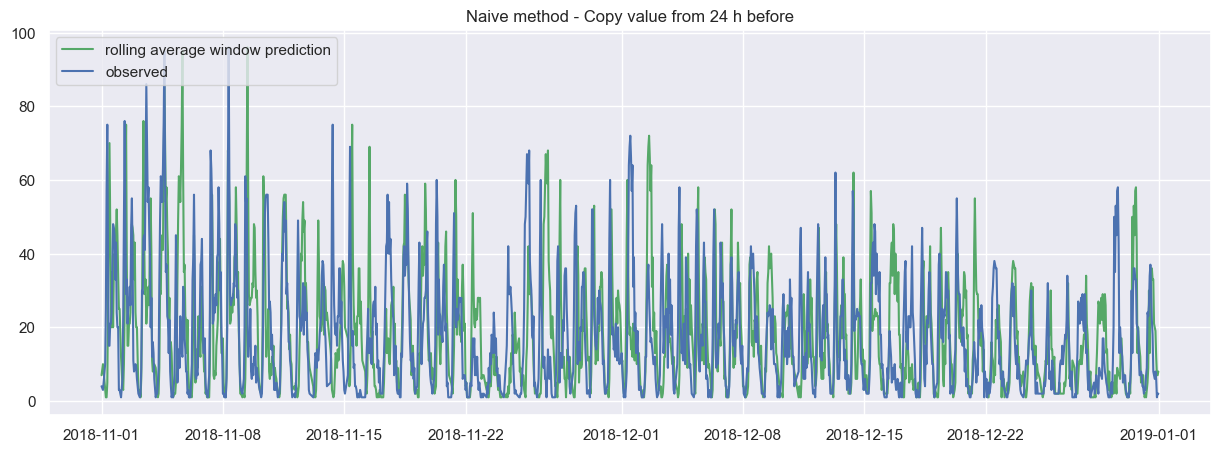

In [48]:
plotprediction(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], labels=['observed', 'rolling average window prediction'], title="Naive method - Copy value from 24 h before")

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_stats(y_test, y_preds, title="You forgot the title!"):
    print(title+": ")
    print("\tr^2=%f"%r2_score(y_test,y_preds))
    print("\tMAE=%f"%mean_absolute_error(y_test,y_preds))
    print("\tMAPE=%f"%mean_absolute_percentage_error(y_test,y_preds))

In [50]:
print_stats(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], "copy method")

copy method: 
	r^2=-0.285499
	MAE=12.606352
	MAPE=134.560191


Using Naive method we don't use any features besides number of trip to predict?!? 

# Trying to do an ARIMA model
### Be aware that for this ARIMA model we only use trip_count as variable to predict - not weekend or any of the others

So QUESTIONS:
Can we get categorical (or event just more data) in the arima model?
How to choose parameters for p,q and d? 

Det kan være at ARIMA med tuning kan blive godt, men Lineær Regression kan muligvis opnå lignende resultater med mindre besvær. -(Konklusion fra kaggle-linket)

In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [52]:
grouped_data = pd.DataFrame(grouped.trip_count.copy())
grouped_data

trip_count
datetime                       
2018-01-01 00:00:00           3
2018-01-01 02:00:00           3
2018-01-01 04:00:00           1
2018-01-01 07:00:00           1
2018-01-01 08:00:00           2
...                         ...
2018-12-31 19:00:00           8
2018-12-31 20:00:00           6
2018-12-31 21:00:00           1
2018-12-31 22:00:00           2
2018-12-31 23:00:00           2

[8003 rows x 1 columns]

In [53]:
data=grouped_data[train_mask]
model=ARIMA(data, order=(24, 0, 0)) #Parameter choice?
AR=model.fit()
print(AR.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             trip_count   No. Observations:                 6649
Model:                ARIMA(24, 0, 0)   Log Likelihood              -25209.082
Date:                Wed, 26 Nov 2025   AIC                          50470.164
Time:                        06:22:50   BIC                          50647.022
Sample:                             0   HQIC                         50531.264
                               - 6649                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5786      2.005     12.256      0.000      20.648      28.509
ar.L1          0.9082      0.009     97.222      0.000       0.890       0.927
ar.L2         -0.1258      0.014     -9.317      0.0

Kan man få Sarima til at tage højde for is_weekend? 
When testing the model - we can update one day at a time? So after we predicted for a day we add the actual values for that day and then try to predict the next one?

# ARIMA 2.0

In [54]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

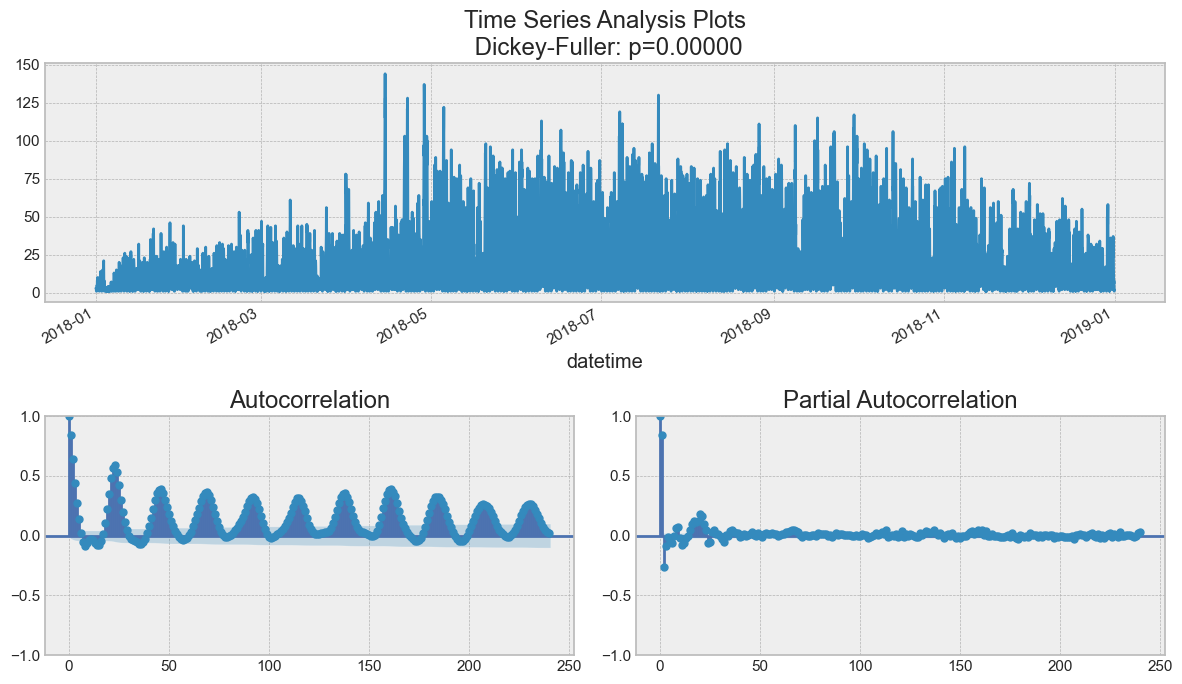

In [55]:
tsplot(grouped_data.trip_count, lags=10*24) #What does plot of Dickey-Fuller test tell me? 

# Adjusting for daily seasonality: 

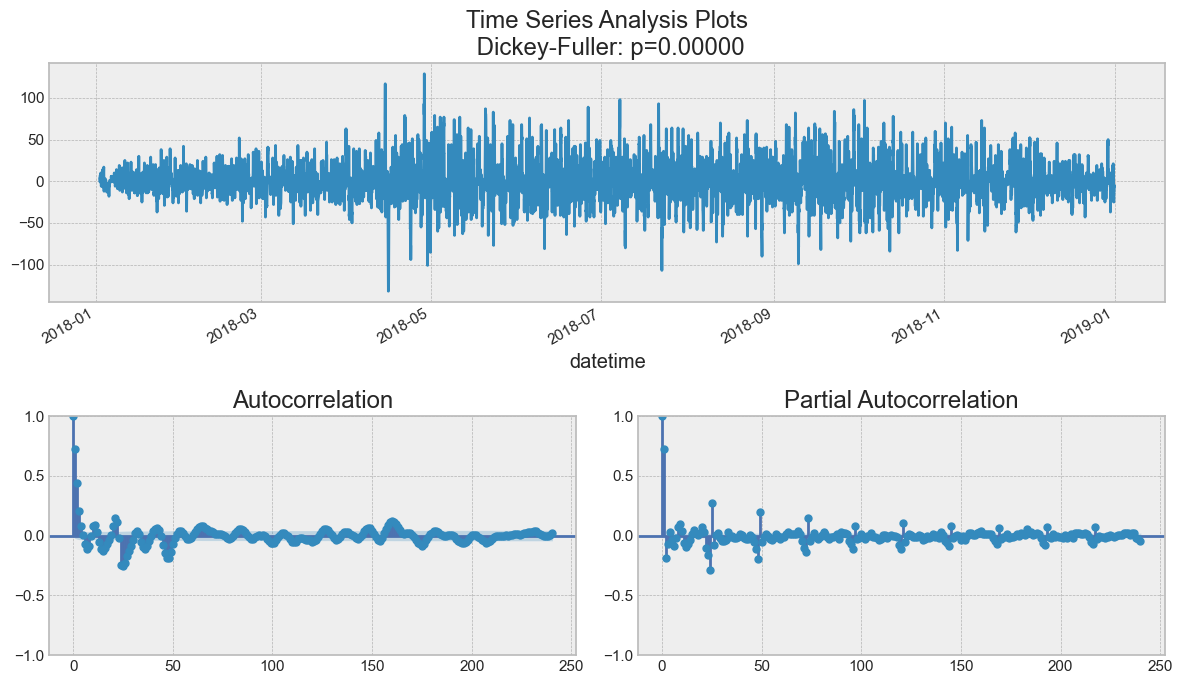

In [56]:
trip_diff = grouped_data.trip_count - grouped_data.trip_count.shift(24) # Dayly seaonality account for 
tsplot(trip_diff[24:], lags=10*24)

In [57]:
# This seems better? 

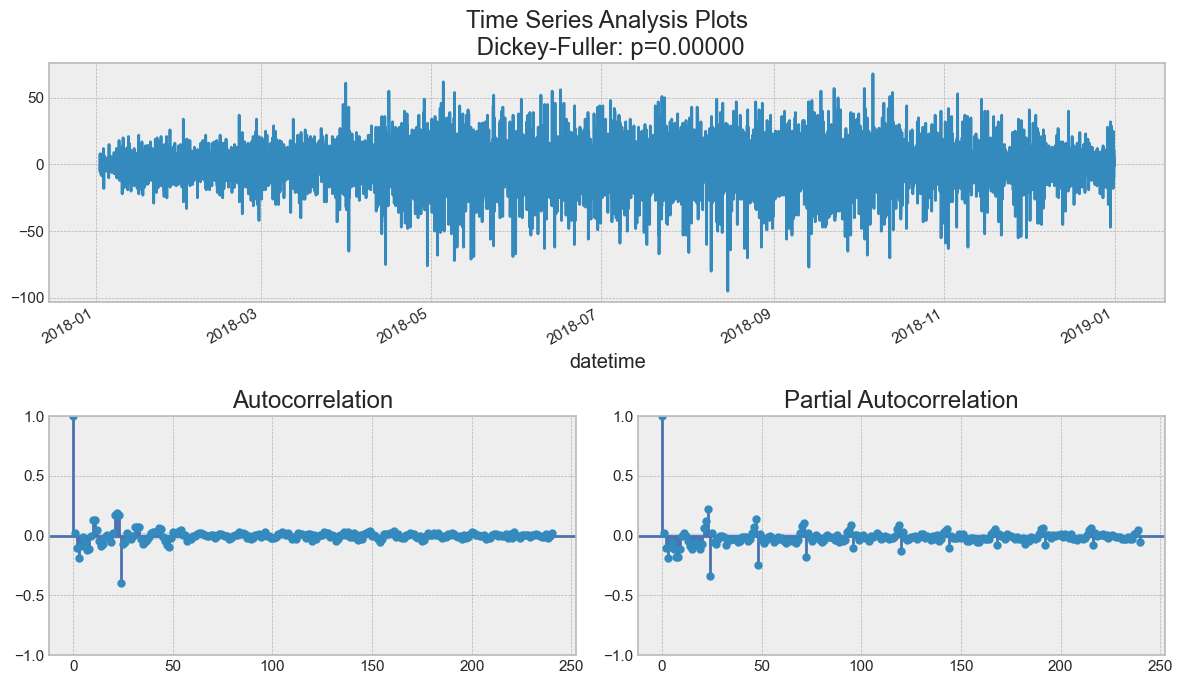

In [58]:
trip_diff = trip_diff - trip_diff.shift(1) #standart shift? 
tsplot(trip_diff[24+1:], lags=10*24)

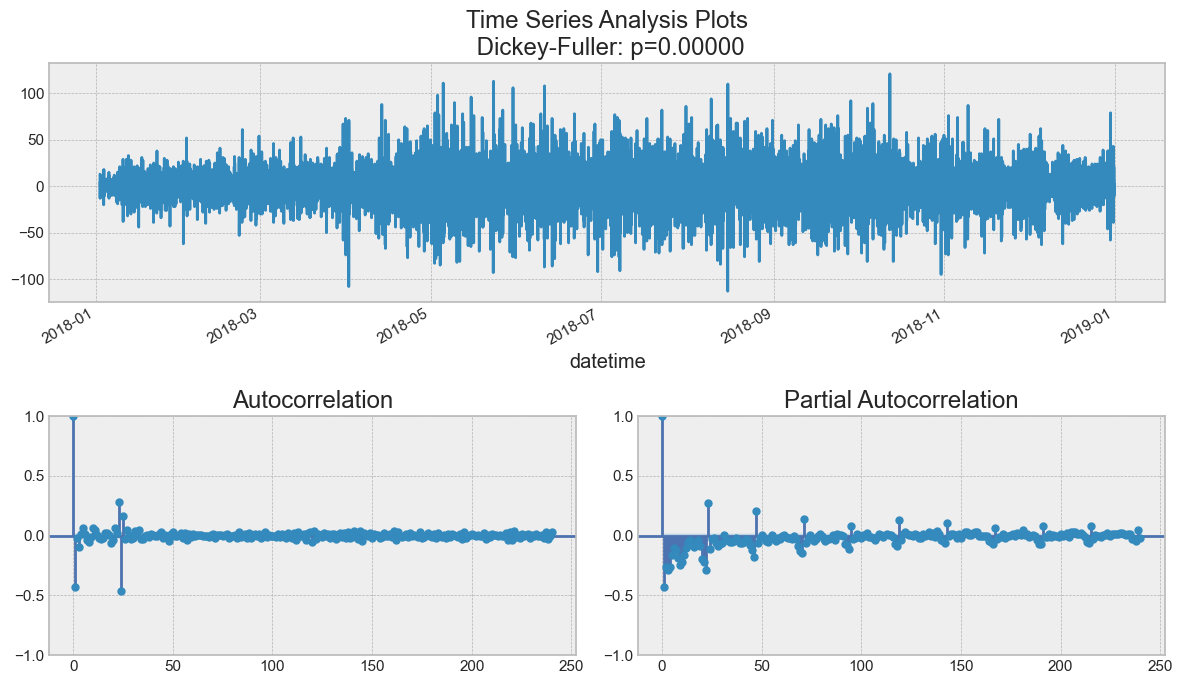

In [59]:
trip_diff = trip_diff - trip_diff.shift(1)
trip_clean = trip_diff[25:].replace([np.inf, -np.inf], np.nan).dropna() #Accountsfor problem with infinity while shifting
tsplot(trip_clean, lags=10*24)

In [60]:
from itertools import product
ps = range(1, 6)
d=0 
qs = range(1, 6)
Ps = range(1, 7)
D=0 
Qs = range(1, 7)
s = 24 # season length is still 24 (One day)

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

900

In [ ]:
# Try fitting all possible parameter combination? 

: 